In [1]:
import string

In [22]:
import nltk

In [68]:
import matplotlib.pyplot as plt

In [8]:
def limpar_caracteres( texto ): 
    pontuacao = string.punctuation + "\n\r\t"
    size = len(pontuacao)
    mytable = str.maketrans(pontuacao, " " * size)
    return texto.translate(mytable)

In [11]:
limpar_caracteres("""palavra1
                  ,palavra2!palavra3""")

'palavra1                    palavra2 palavra3'

In [40]:
def ler_arquivo( nome_arquivo ):
    arquivo = open(nome_arquivo, "r", encoding='utf-8')
    texto = arquivo.read()
    arquivo.close()
    return limpar_caracteres(texto.lower())

In [41]:
texto = ler_arquivo("./viver.txt")

In [42]:
def extrair_tokens( texto ):
    return nltk.tokenize.word_tokenize( texto )
    # return texto.split(" ")

In [43]:
tokens = extrair_tokens( texto )

In [44]:
stop_words = nltk.corpus.stopwords.words('portuguese') + ['peito', 'bunda', 'pra', 'vc']

In [45]:
def remover_stop_words( tokens ):
    lista_tokens_limpos = []
    for token in tokens:
        if token not in stop_words:
            lista_tokens_limpos.append(token)
    return lista_tokens_limpos

In [46]:
remover_stop_words(tokens)

['impossível',
 'atravessar',
 'vida…',
 'trabalho',
 'saia',
 'mal',
 'feito',
 'amizade',
 'cause',
 'decepção',
 'padecer',
 'alguma',
 'doença',
 'amor',
 'abandone',
 'ninguém',
 'família',
 'morra',
 'gente',
 'engane',
 'negócio',
 'custo',
 'viver',
 'importante',
 'acontece',
 'reage',
 'cresce',
 'perde',
 'esperança',
 'diminui',
 'vontade',
 'perde',
 'fé',
 'aceita',
 'realidade',
 'orgulho',
 'vivê',
 'la',
 'aceita',
 'destino',
 'garra',
 'mudá',
 'lo',
 'aceita',
 'deixa',
 'trás',
 'construindo',
 'frente',
 'planejando',
 'vir',
 'cresce',
 'supera',
 'valoriza',
 'sabe',
 'dar',
 'frutos',
 'cresce',
 'abre',
 'caminho',
 'assimila',
 'experiências…',
 'semeia',
 'raízes…',
 'cresce',
 'impõe',
 'metas',
 'importar',
 'comentários',
 'cresce',
 'forte',
 'caráter',
 'sustentado',
 'formação',
 'sensível',
 'temperamento…',
 'humano',
 'nascimento',
 'cresce',
 'ajudando',
 'semelhantes',
 'conhecendo',
 'si',
 'dando',
 'vida',
 'recebe',
 'assim',
 'cresce…']

In [49]:
def dicionario( tokens ):
    dicionario = {}
    for token in tokens:
        if token in dicionario:
            dicionario[token] = dicionario[token] + 1
        else:
            dicionario[token] = 1
    return dicionario

In [54]:
d1 = dicionario(tokens)

In [66]:
def dicionario_top_20( dicionario ):
    lista = list(dicionario.items())
    lista.sort(key=lambda item : item[1], reverse=True)
    return lista[0:20]

In [72]:
d1 = dicionario_top_20(d1)

In [78]:
d1

[('que', 10),
 ('a', 8),
 ('quando', 8),
 ('sem', 7),
 ('e', 7),
 ('o', 6),
 ('cresce', 6),
 ('se', 5),
 ('por', 4),
 ('um', 3),
 ('é', 3),
 ('de', 3),
 ('aceita', 3),
 ('tem', 3),
 ('com', 2),
 ('não', 2),
 ('mas', 2),
 ('você', 2),
 ('perde', 2),
 ('nem', 2)]

In [76]:
def gerar_grafico( matriz ):
    d = dict(matriz)
    chaves = list(d.keys())
    valores = list(d.values())
    plt.barh(chaves, valores)

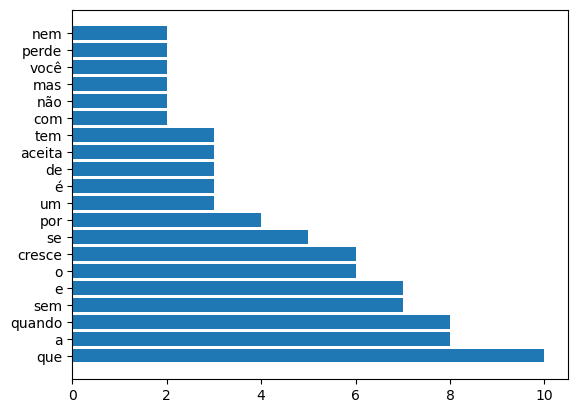

In [77]:
gerar_grafico( d1 )

In [79]:
def ler_arquivo_gerar_grafico( nome_arquivo ):
    texto = ler_arquivo(nome_arquivo)
    tokens = extrair_tokens( texto )
    tokens_limpos = remover_stop_words( tokens )
    d1 = dicionario( tokens_limpos )
    d1_top20 = dicionario_top_20(d1)
    gerar_grafico(d1_top20)

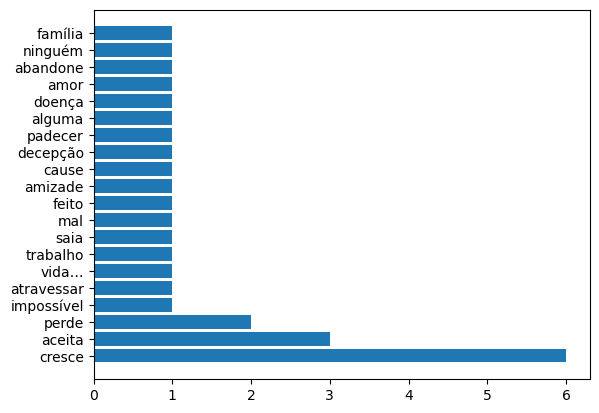

In [80]:
ler_arquivo_gerar_grafico("viver.txt")

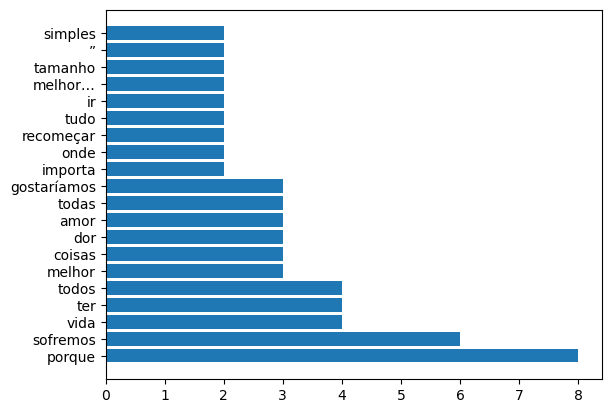

In [81]:
ler_arquivo_gerar_grafico("recomecar.txt")

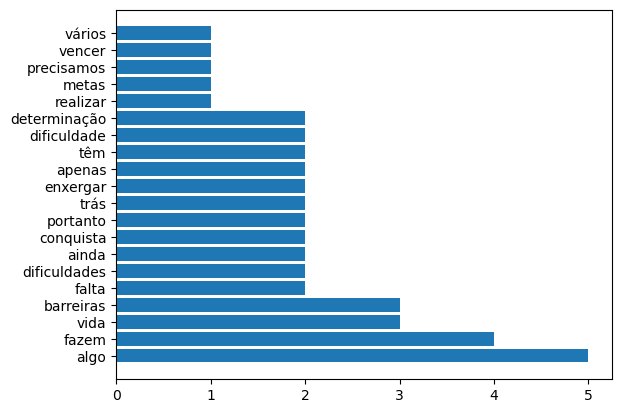

In [82]:
ler_arquivo_gerar_grafico("supere_barreiras.txt")